Joshua Avakian - CSCI 191T

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/train.csv")
df2 = pd.read_csv("/test.csv")/255


print(df.head())

   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


#Visualize Data

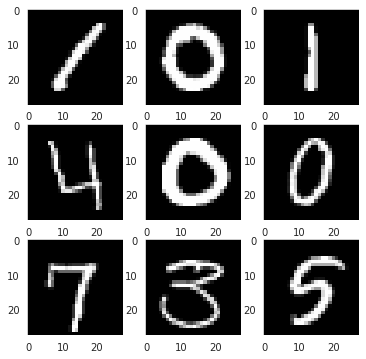

In [ ]:
plt.figure(figsize=(6,6))

for i in range(9):
    img = np.asarray(df.iloc[i,1:].values.reshape((28,28))/255);
    ax=plt.subplot(3, 3, i+1)
    ax.grid(False)
    plt.imshow(img, cmap='gray')
    
plt.show()

#Using Kera's Relu

In [ ]:
Y = df.label
Y = pd.get_dummies(Y)
X = df.drop('label', axis=1)/255

X_Data, X_Valid, Y_Data, Y_Valid = train_test_split(X,Y,train_size=0.9,test_size=0.1,random_state=0)

#use keras

neuralModel = keras.Sequential([
                                layers.Dense(units=256, activation='relu', input_shape=[784]),
                                layers.Dropout(rate=0.4),

                                layers.Dense(units=256, activation='relu'),
                                layers.Dropout(rate=0.4),

                                layers.Dense(units=10, activation='softmax')
])

neuralModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(patience=10,min_delta=0.0001,restore_best_weights=True,)

#Epochs, Accuracy, and Predictions (With Early stop incase of model Plateau)

In [ ]:
history = neuralModel.fit(X_Data, Y_Data, validation_data=(X_Valid,Y_Valid),batch_size=500,epochs=100,callbacks=[early_stopping],verbose=True)



Epoch 1/100
76/76 [==============================] - 2s 23ms/step - loss: 0.7315 - categorical_accuracy: 0.7731 - val_loss: 0.2684 - val_categorical_accuracy: 0.9214
Epoch 2/100
76/76 [==============================] - 1s 20ms/step - loss: 0.2836 - categorical_accuracy: 0.9149 - val_loss: 0.1910 - val_categorical_accuracy: 0.9426
Epoch 3/100
76/76 [==============================] - 1s 19ms/step - loss: 0.2097 - categorical_accuracy: 0.9372 - val_loss: 0.1552 - val_categorical_accuracy: 0.9533
Epoch 4/100
76/76 [==============================] - 1s 19ms/step - loss: 0.1707 - categorical_accuracy: 0.9487 - val_loss: 0.1350 - val_categorical_accuracy: 0.9586
Epoch 5/100
76/76 [==============================] - 1s 19ms/step - loss: 0.1457 - categorical_accuracy: 0.9565 - val_loss: 0.1269 - val_categorical_accuracy: 0.9624
Epoch 6/100
76/76 [==============================] - 1s 20ms/step - loss: 0.1281 - categorical_accuracy: 0.9607 - val_loss: 0.1167 - val_categorical_accuracy: 0.9655
Epoc

#Cross Entrophy and Accuracy Plot with Prediction Model

Final accuracy on validation set: 0.9790475964546204


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


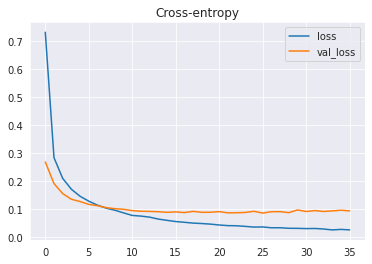

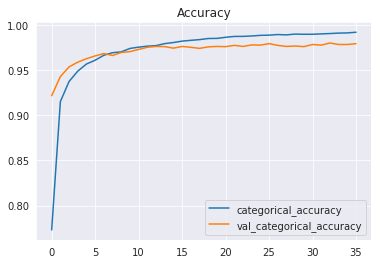

In [ ]:
historyData = pd.DataFrame(history.history)
historyData.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
historyData.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot(title="Accuracy")

print('Final accuracy on validation set:', 
      historyData.loc[len(historyData)-1,'val_categorical_accuracy'])

prediction = neuralModel.predict(df2)
prediction_classes = np.argmax(prediction, axis=1)
output = pd.DataFrame({'ImageId': df2.index+1,'Label': prediction_classes})
output.head()